In [7]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# setting up styles for visualizations
sns.set(style="whitegrid")

# importing models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [13]:
df= pd.read_excel('heart.xlsx')

In [14]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.shape

(303, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


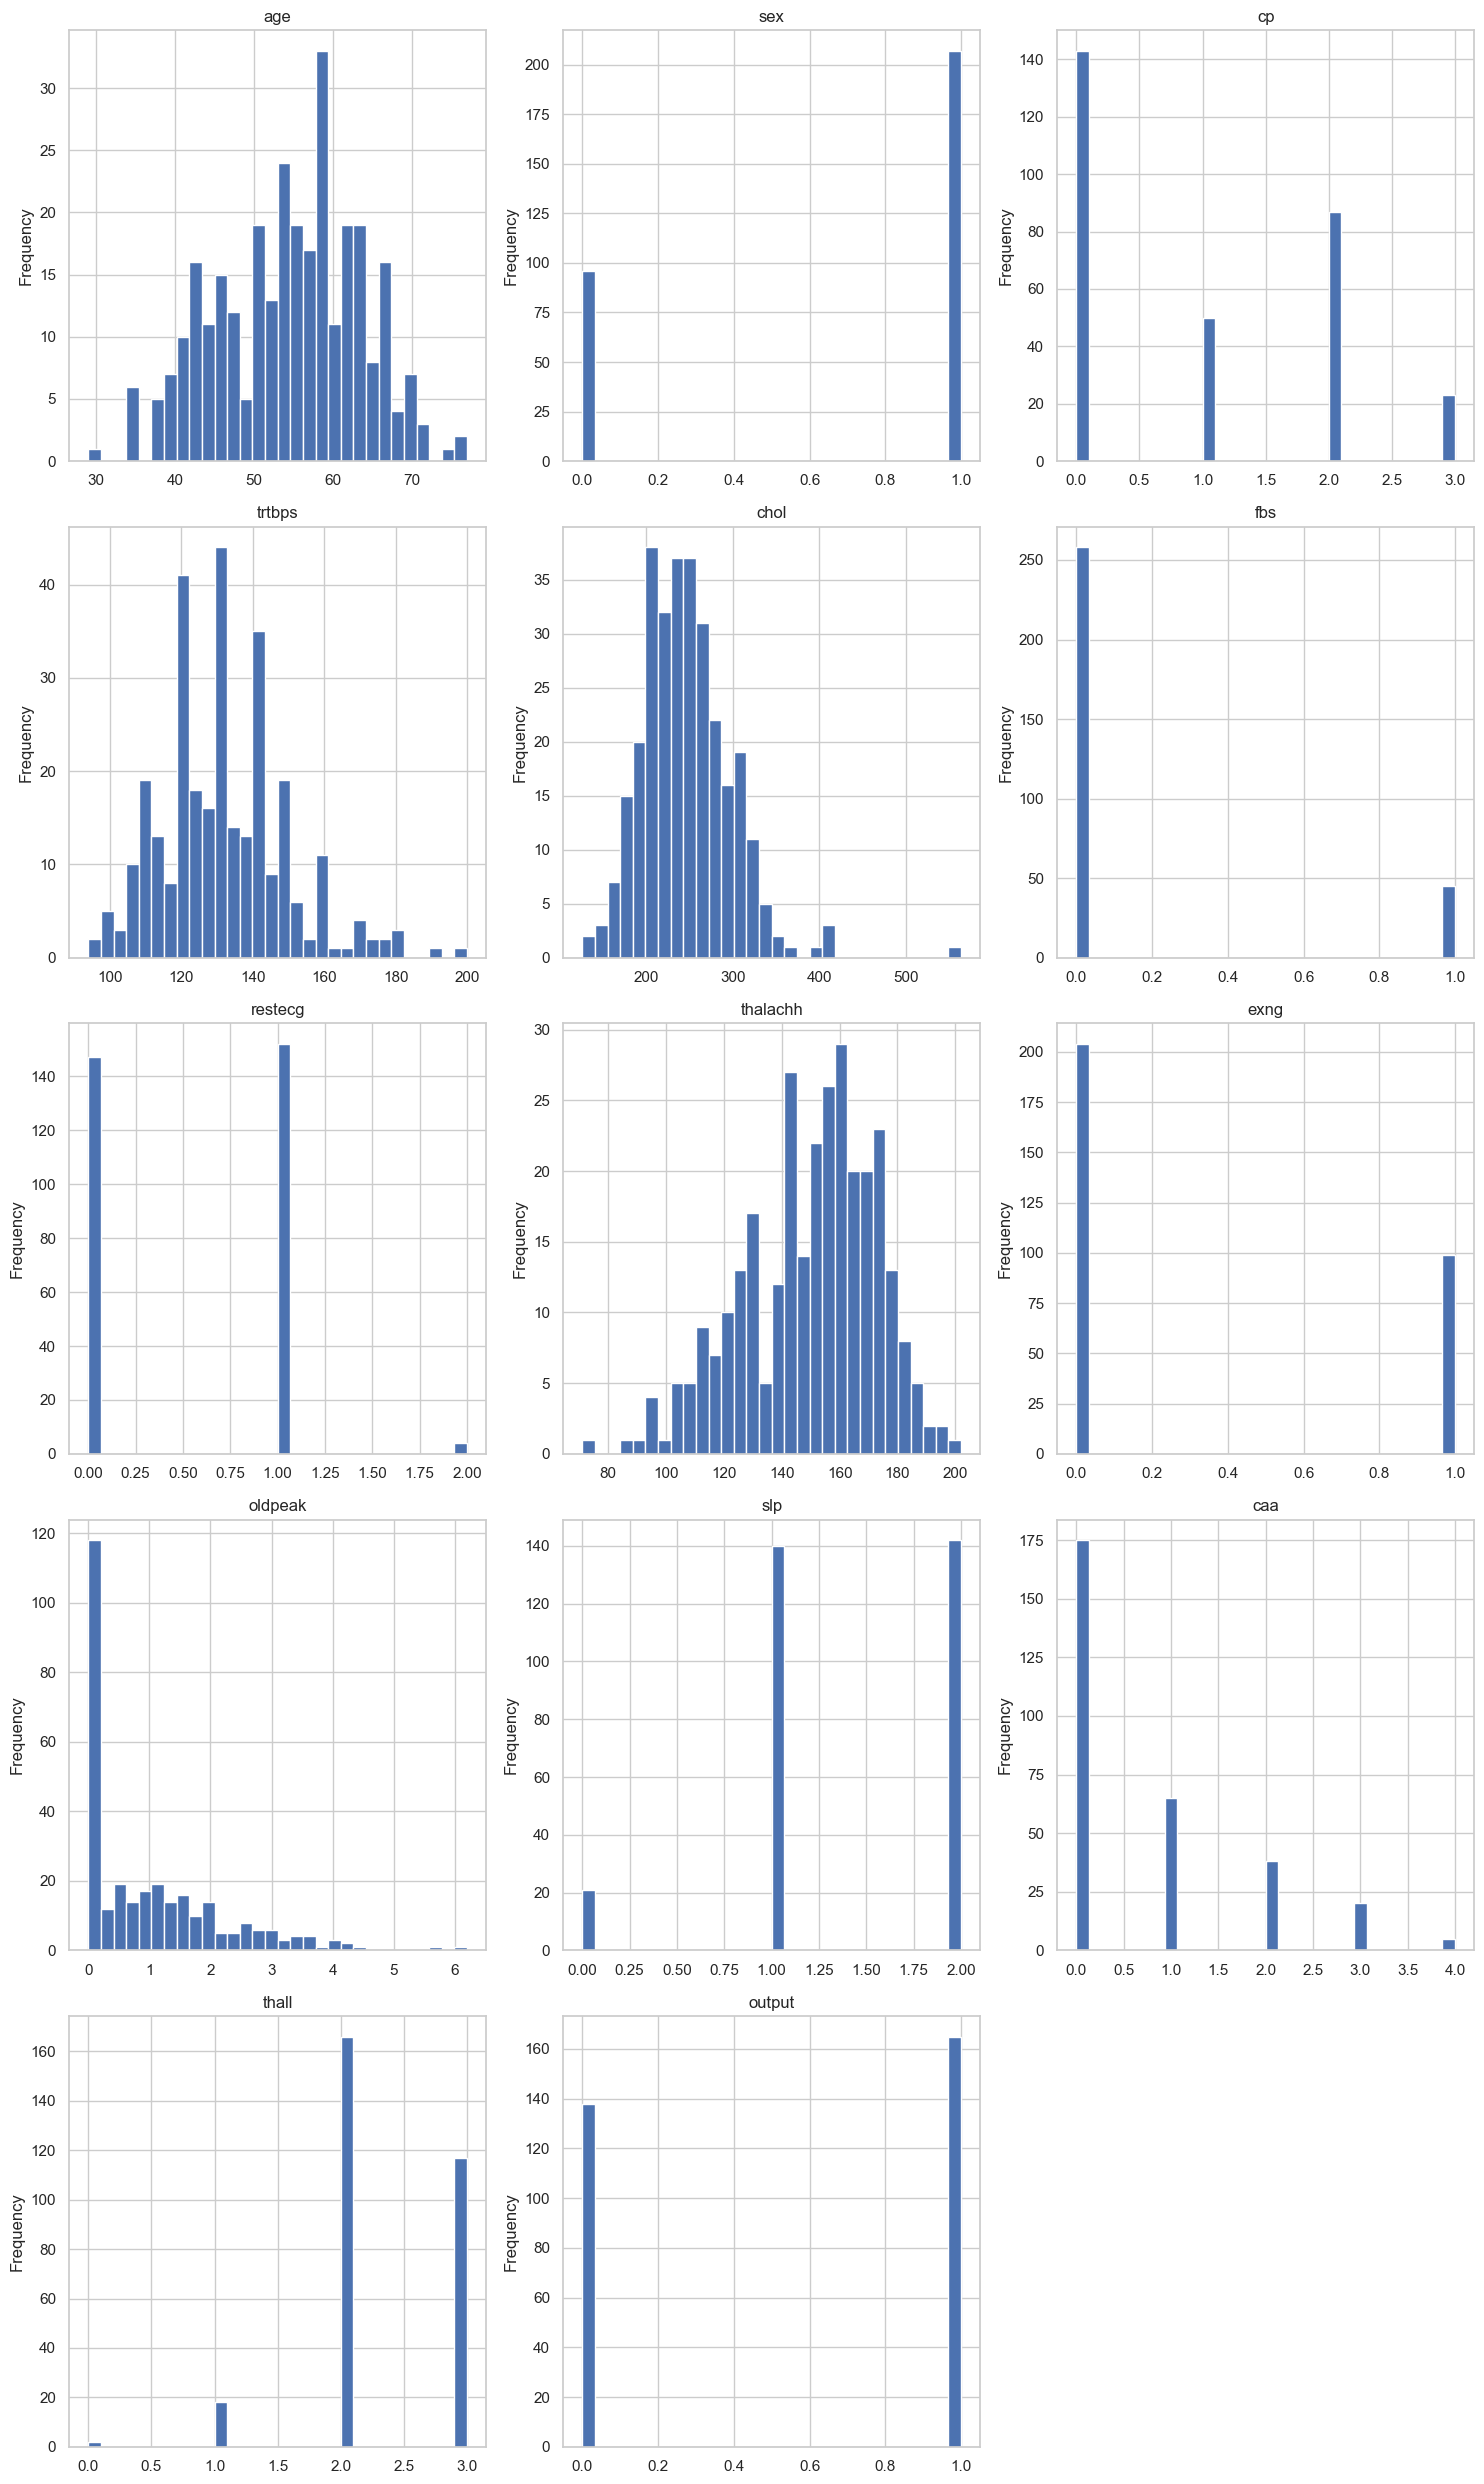

In [21]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histogram for each column
for i, col in enumerate(df.columns):
    df[col].plot(kind='hist', ax=axes[i], title=col, bins=30)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Only the age is somewhat normalized

In [17]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
# Encoding the identified categorical variables (One hot encoding)
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thall', 'slp', 'caa'], drop_first=True)
# drop=first drops the original columns

# Displaying the first few rows of the encoded dataframe
df_encoded.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,...,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,63,1,145,233,1,150,0,2.3,1,False,...,False,True,False,False,False,False,False,False,False,False
1,37,1,130,250,0,187,0,3.5,1,False,...,False,False,True,False,False,False,False,False,False,False
2,41,0,130,204,0,172,0,1.4,1,True,...,False,False,True,False,False,True,False,False,False,False
3,56,1,120,236,0,178,0,0.8,1,True,...,False,False,True,False,False,True,False,False,False,False
4,57,0,120,354,0,163,1,0.6,1,False,...,False,False,True,False,False,True,False,False,False,False


In [19]:
# Creating a StandardScaler object
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Applying StandardScaler only to the specified columns
df_scaled = df_encoded.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Display the first few rows of the scaled dataframe
df_scaled.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,...,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,1,False,...,False,True,False,False,False,False,False,False,False,False
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,1,False,...,False,False,True,False,False,False,False,False,False,False
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,1,True,...,False,False,True,False,False,True,False,False,False,False
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,1,True,...,False,False,True,False,False,True,False,False,False,False
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,1,False,...,False,False,True,False,False,True,False,False,False,False


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df_scaled.drop('output', axis=1) #All the dataset withput the output
y = df_scaled['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,cp_1,cp_2,...,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,False,False,...,False,True,False,False,False,False,False,False,False,False
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,False,True,...,False,False,True,False,False,False,False,False,False,False
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,True,False,...,False,False,True,False,False,True,False,False,False,False
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,True,False,...,False,False,True,False,False,True,False,False,False,False
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0.478391,-0.101730,0,-1.165281,1,-0.724323,False,False,...,False,False,False,True,True,False,False,False,False,False
299,-1.033002,1,-1.234996,0.342756,0,-0.771706,0,0.138373,False,False,...,False,False,False,True,True,False,False,False,False,False
300,1.503641,1,0.706843,-1.029353,1,-0.378132,0,2.036303,False,False,...,False,False,False,True,True,False,False,True,False,False
301,0.290464,1,-0.092738,-2.227533,0,-1.515125,1,0.138373,False,False,...,False,False,False,True,True,False,True,False,False,False


In [28]:
dt_gini= DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)